<a href="https://colab.research.google.com/github/KeiandraK/DS-Unit-1-Build/blob/master/Keiandra_King_BW1_Project1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE TO SELF


1.   Clean the data
2.   Find what is interesting about the data
3.   Create awesome visualizations to help articulate the data.
4.   Create a stellar website and awesome presentation
5.   Most importantly YOU GOT THIS!!!! 



# Research Questions

*   What factors play into contracting the botulism toxins?
*   How likely are you or your family to be poisend unknowingly?


*   How common is it to contract the toxin?
*   What is the most common contracting form?





In [214]:
import pandas as pd
cdc_bot=pd.read_csv('https://data.cdc.gov/api/views/66i6-hisz/rows.csv?accessType=DOWNLOAD')
cdc_bot.head()
# Bot Type stands for botulism transmission type
#Toxin Types A and B are capable of causing disease in humans
# and are also used commercially and medically

,State,Year,BotType,ToxinType,Count
0,Alaska,1947,Foodborne,Unknown,3
1,Alaska,1948,Foodborne,Unknown,4
2,Alaska,1950,Foodborne,E,5
3,Alaska,1952,Foodborne,E,1
4,Alaska,1956,Foodborne,E,5


In [215]:
cdc_bot.shape

(2280, 5)

In [216]:
cdc_bot.isnull().sum()

State        34
Year          0
BotType       0
ToxinType     0
Count         0
dtype: int64

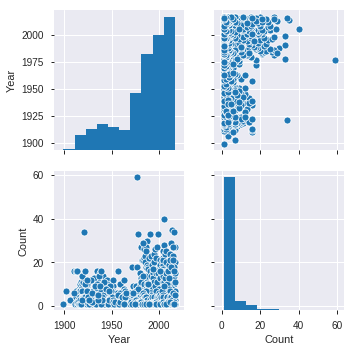

In [217]:
import seaborn as sns
sns.pairplot(cdc_bot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e566f6a20>,
      dtype=object)

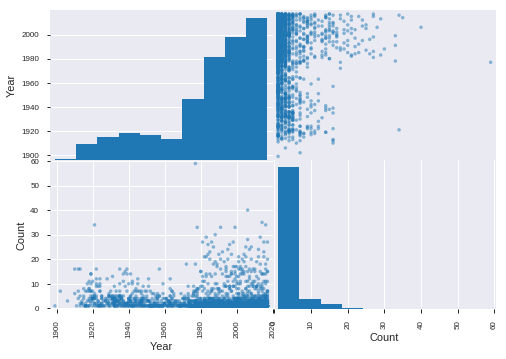

In [218]:
pd.plotting.scatter_matrix(cdc_bot)

In [219]:
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')


Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.1.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.2.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [221]:
import pandas_profiling 
cdc_bot.profile_report()

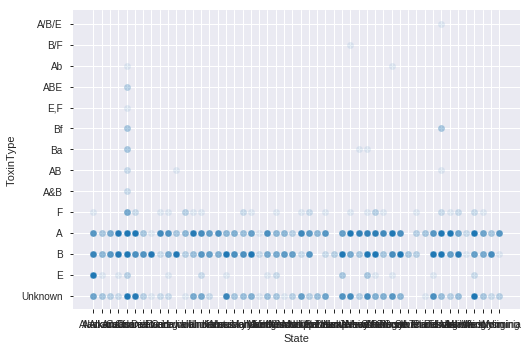

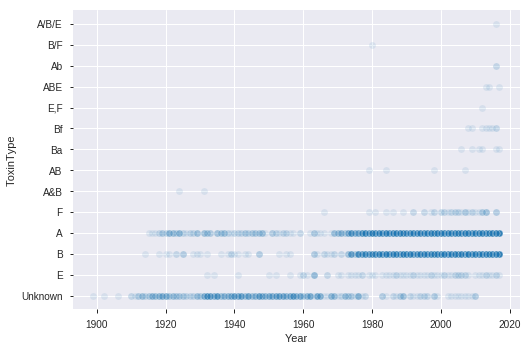

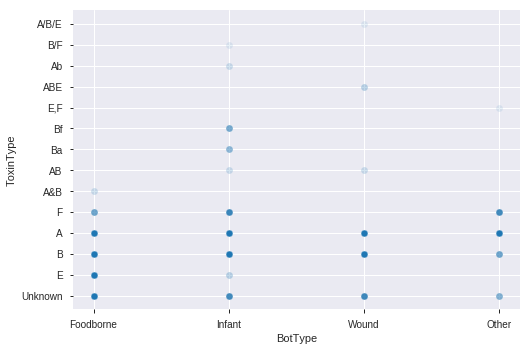

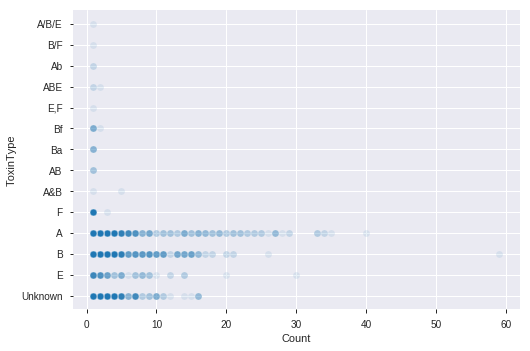

In [222]:
import matplotlib.pyplot as plt
target = 'ToxinType'
features = cdc_bot.columns.drop(['ToxinType'])
for feature in features:
    sns.scatterplot(x=feature, y=target, data=cdc_bot, alpha=0.1)
    plt.show()

In [223]:
! pip install plotly==4.1.0

  Using cached https://files.pythonhosted.org/packages/63/2b/4ca10995bfbdefd65c4238f9a2d3fde33705d18dd50914dd13302ec1daf1/plotly-4.1.0-py2.py3-none-any.whl
  Found existing installation: plotly 4.2.1
    Uninstalling plotly-4.2.1:
      Successfully uninstalled plotly-4.2.1


In [224]:
# I ahve categorized the Toxin types into numerical values based on Toxin groups
# A-B share the same toxin group and E-F share the same toxin group 
# Toxins AB and Bf are sub groups there share the same numerical value
import numpy as np
np.NaN
cdc_bot=cdc_bot.replace({'A':1, 'B':1, 'E':2, 'F':2, 'AB':3,'Ab':3, 'A&B':3, 
                         'Ba':3,'Bf':3, 'B/F':3, 'E,F':3,'ABE':3,'A/B/E':3, 'Unknown':np.NaN})
cdc_bot.head()

,State,Year,BotType,ToxinType,Count
0,Alaska,1947,Foodborne,NaN,3
1,Alaska,1948,Foodborne,NaN,4
2,Alaska,1950,Foodborne,2.0,5
3,Alaska,1952,Foodborne,2.0,1
4,Alaska,1956,Foodborne,2.0,5


In [225]:
cdc_bot=cdc_bot.fillna(0)
cdc_bot.head()

,State,Year,BotType,ToxinType,Count
0,Alaska,1947,Foodborne,0.0,3
1,Alaska,1948,Foodborne,0.0,4
2,Alaska,1950,Foodborne,2.0,5
3,Alaska,1952,Foodborne,2.0,1
4,Alaska,1956,Foodborne,2.0,5


In [226]:
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
# I am performing ttest based on the count and the year.
# This can predict future exposure of the toxin regardless of exposure type.
# The goal here is to predict hwo common or likely it ios to contract this type
# of toxin. LET'S Get startec

count= cdc_bot['Count']
print(count.shape)
count.head()

(2280,)


0    3
1    4
2    5
3    1
4    5
Name: Count, dtype: int64

In [227]:
toxin_type= cdc_bot['ToxinType']
print(toxin_type.shape)
toxin_type.head()

(2280,)


0    0.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: ToxinType, dtype: float64

In [228]:
np.mean(cdc_bot)
#This test shows that 1985 had the most cases of the botulinum toxin

Year         1985.741667
ToxinType       0.912719
Count           3.199123
dtype: float64

In [229]:
print(np.mean(toxin_type))

0.912719298245614


In [233]:
import plotly.express as px

tox_data = px.histogram(cdc_bot, x="Year", y="Count", color="ToxinType", marginal="rug",
                   hover_data=cdc_bot.columns)
tox_data.show()

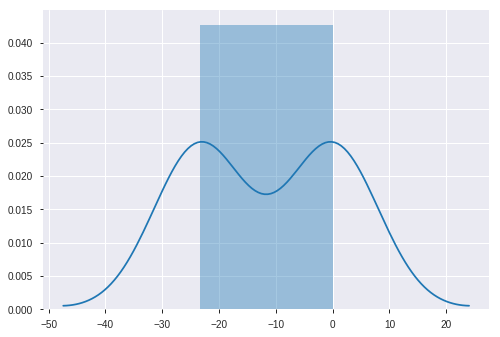

In [234]:
sns.distplot(stats_tox);

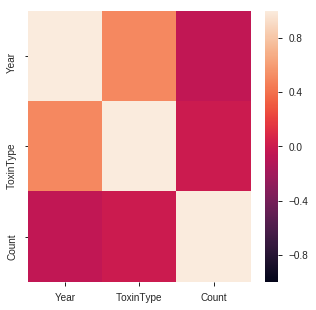

In [235]:
plt.figure(figsize=(5,5))
sns.heatmap(cdc_bot.corr(),vmin=-1);

In [236]:
! pip install geopandas

AttributeError: ignored

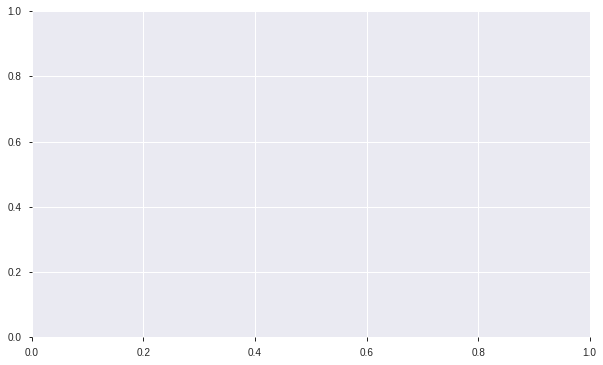

In [237]:
#Geo pandas 
variable = cdc_bot['ToxinType']
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
cdc_bot.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor=0.8)